In [1]:
from langchain.agents import create_csv_agent
import os

In [2]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType

In [3]:
OpenAI.api_key = os.getenv('OPENAI_API_KEY')

In [4]:
agent = create_csv_agent(
    OpenAI(temperature=0), 
    'data.csv', 
    verbose=True, 
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION
)

In [5]:
agent.run("how many orders are there?")



> Entering new  chain...
Thought: I need to count the number of orders
Action: python_repl_ast
Action Input: df['Order ID'].nunique()
Observation: 685
Thought: I now know the final answer
Final Answer: There are 685 orders.

> Finished chain.


'There are 685 orders.'

In [6]:
agent.run("what is the total revenue of Fruits sale for all countries?")



> Entering new  chain...
Thought: I need to filter the dataframe to only include Fruits and then sum the Total Revenue column
Action: python_repl_ast
Action Input: df[df['Item Type'] == 'Fruits']['Total Revenue'].sum()
Observation: 2443573.65
Thought: I now know the final answer
Final Answer: The total revenue of Fruits sale for all countries is 2,443,573.65.

> Finished chain.


'The total revenue of Fruits sale for all countries is 2,443,573.65.'

In [9]:
agent.run("which country gives highest total profit summed up and how much? ")



> Entering new  chain...
Thought: I need to find the country with the highest total profit
Action: python_repl_ast
Action Input: df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(1)
Observation: Country
Papua New Guinea    4667031.21
Name: Total Profit, dtype: float64
Thought: I now know the final answer
Final Answer: Papua New Guinea has the highest total profit of 4,667,031.21.

> Finished chain.


'Papua New Guinea has the highest total profit of 4,667,031.21.'



> Entering new  chain...
Thought: I need to group the data by country and sum the total profits
Action: python_repl_ast
Action Input: df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(5).plot.bar()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar graph with sum of total profits on y axis for top 5 countries.

> Finished chain.


'A bar graph with sum of total profits on y axis for top 5 countries.'

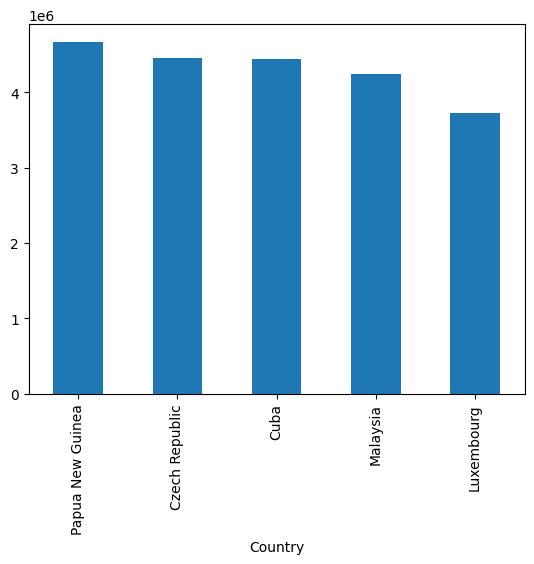

In [20]:
agent.run("show me a bar graph for top 5 countries with highest total profit summed up")

In [19]:
agent.run("who is most successful rep? also please show me top 3 rep names by percentage of profit for the sales they made")



> Entering new  chain...
Thought: I need to calculate the total profit for each rep and then sort them by percentage of profit
Action: python_repl_ast
Action Input: df.groupby('Rep Name')['Total Profit'].sum().sort_values(ascending=False)
Observation: Rep Name
Una Terry                1726181.36
Lucas McLean             1714010.46
Sophie Roberts           1697666.68
Jacob Brown              1682887.73
Kimberly Oliver          1641058.46
                            ...    
Christopher Robertson       1937.64
Jessica Lyman               1785.24
Molly Blake                  927.85
Angela Welch                 706.13
Leonard Paterson             660.34
Name: Total Profit, Length: 685, dtype: float64
Thought: I need to calculate the percentage of profit for each rep
Action: python_repl_ast
Action Input: df.groupby('Rep Name')['Total Profit'].sum().sort_values(ascending=False)/df['Total Profit'].sum()
Observation: Rep Name
Una Terry                0.006668
Lucas McLean             0.006621

'Una Terry, Lucas McLean, and Sophie Roberts are the most successful reps, with Una Terry having the highest percentage of profit for the sales they made.'

In [21]:
agent.run("which country uses most make up products overall?")



> Entering new  chain...
Thought: I need to find the country with the highest total units sold of make up products
Action: python_repl_ast
Action Input: df[df['Item Type'] == 'Cosmetics'].groupby('Country')['Units Sold'].sum().sort_values(ascending=False).head(1)
Observation: Country
Belgium    9928
Name: Units Sold, dtype: int64
Thought: I now know the final answer
Final Answer: Belgium

> Finished chain.


'Belgium'

In [26]:
agent.run("which product has highest total revenue summed up?")



> Entering new  chain...
Thought: I need to find the product with the highest total revenue
Action: python_repl_ast
Action Input: df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
Observation: Item Type
Office Supplies    1.869500e+08
Household          1.737883e+08
Meat               1.215166e+08
Cosmetics          1.182036e+08
Baby Food          7.025663e+07
Vegetables         5.033541e+07
Cereal             4.969979e+07
Snacks             4.563286e+07
Clothes            2.545186e+07
Personal Care      2.385486e+07
Beverages          1.852125e+07
Fruits             2.443574e+06
Name: Total Revenue, dtype: float64
Thought: Office Supplies has the highest total revenue
Final Answer: Office Supplies has the highest total revenue.

> Finished chain.


'Office Supplies has the highest total revenue.'

In [ ]:
agent.run("what is the most profitable product? sum up the values if required")



> Entering new  chain...
Thought: I need to group the data by year and sum the units sold
Action: python_repl_ast
Action Input: df.groupby('Order_Year')['Units Sold'].sum().plot.bar()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar graph of total units sold by year.

> Finished chain.


'A bar graph of total units sold by year.'

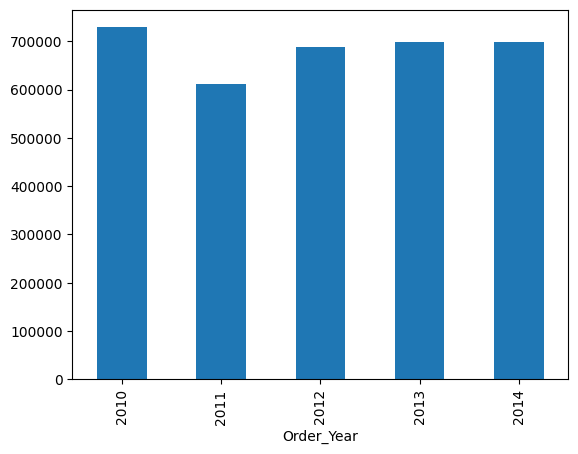

In [7]:
agent.run("show me a bar graph of total units sold by year")



> Entering new  chain...
Thought: I need to group the data by year and sum the profits
Action: python_repl_ast
Action Input: df.groupby('Order_Year')['Total Profit'].sum().plot.pie(autopct='%1.1f%%', labels=df.Order_Year.unique())
Observation: Axes(0.22375,0.11;0.5775x0.77)
Thought: I now know the final answer
Final Answer: A pie chart of yearwise sum of profits with appropriate labels.

> Finished chain.


'A pie chart of yearwise sum of profits with appropriate labels.'

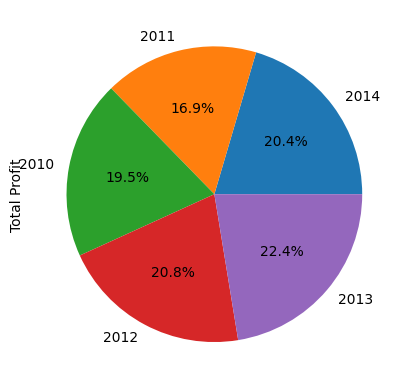

In [11]:
agent.run("show me a pi chart of yearwise sum of profits. Also add appropriate lables to the graph.") 

In [ ]:
agent.run("which is the least profitable product across all the years and coutnties")

In [ ]:
agent.run("what is the average profit percentage across all products in India")

In [9]:
agent.run("do we sell mobile phones?")



> Entering new  chain...
Thought: I need to check the Item Type column
Action: python_repl_ast
Action Input: df['Item Type'].unique()
Observation: ['Cosmetics' 'Vegetables' 'Cereal' 'Fruits' 'Clothes' 'Snacks' 'Beverages'
 'Household' 'Personal Care' 'Baby Food' 'Office Supplies' 'Meat']
Thought: Mobile phones are not in the list
Final Answer: No, we do not sell mobile phones.

> Finished chain.


'No, we do not sell mobile phones.'

In [10]:
agent.run("do we sell snacks?")



> Entering new  chain...
Thought: I need to check what items we sell
Action: python_repl_ast
Action Input: df['Item Type'].unique()
Observation: ['Cosmetics' 'Vegetables' 'Cereal' 'Fruits' 'Clothes' 'Snacks' 'Beverages'
 'Household' 'Personal Care' 'Baby Food' 'Office Supplies' 'Meat']
Thought: Snacks are included in the list
Final Answer: Yes, we sell snacks.

> Finished chain.


'Yes, we sell snacks.'